<a href="https://colab.research.google.com/github/chetan7116desai/TEAM_A_data606/blob/main/Data_Cleansing/2_1_FLU_Datacleaning%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Vaccine Efficiency Prediction using machine learning techniques**


In [ ]:
# Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')
import re
import numpy as np

In [ ]:
df_vax = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_vax.csv")
df_vax.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_symp = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_sym.csv")
df_symp.drop('Unnamed: 0',axis=1,inplace=True)


In [ ]:
df_data = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_pat.csv")
df_data.drop('Unnamed: 0',axis=1,inplace=True)


## Common Functions

In [ ]:
def sanitycheck(df):
    """
    Generates Unique count, Null Count and Null Percentage for each column in Dataframe
    
    Parameters
    ---------
    Input pandas dataframe
    
    Output: pandas dataframe
    """
    data = []
    for col in df.columns:
        data.append({'Column' : col,'Unique' : len(df[col].unique()),
                'Null Count' : df[col].isnull().sum(),
                'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
    return pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

In [ ]:
def binaryconvert(df,cols):
    """
    Converts categorical value with Y and N to binary 0's and 1's    
    Parameters
    ---------
    Input pandas dataframe and column names
    
    Output: pandas dataframe
    """
    for col in cols:
      df[col] = np.where(df[col] == "Y", 1, 0)


In [ ]:
def regex_clean(text):
            
    # Remove special terms    
    text = re.sub(pattern='#x200B;|&lt;|&gt;|&amp;|_', repl=' ', string=str(text))  
    
    # Remove all digits
    text = re.sub(pattern=r'\d+', repl=' ', string=str(text))
    #text = re.sub(pattern=r'\w*\d\w*', repl='', string=text)
    
    # Remove non-english symbols
    text = re.sub(pattern=r'[^a-zA-Z1-9]+', repl=' ', string=str(text))
  
    return text

## INFLUENZA Vaccine Data Exploration

### INFLUENZA VAERS vaccine data

In [ ]:
# Filtering only INFLUENZA Vaccine info
df_Flu_vax = df_vax[(df_vax['VAX_TYPE'] =='FLU(H1N1)') | (df_vax['VAX_TYPE'] =='FLU3') | (df_vax['VAX_TYPE'] =='FLU4') | 
                     (df_vax['VAX_TYPE'] =='FLUA3') | (df_vax['VAX_TYPE'] =='FLUA4') | (df_vax['VAX_TYPE'] =='FLUC3') |
                     (df_vax['VAX_TYPE'] =='FLUC4') | (df_vax['VAX_TYPE'] =='FLUN(H1N1)') | (df_vax['VAX_TYPE'] =='FLUN3') |
                    (df_vax['VAX_TYPE'] =='FLUN4') | (df_vax['VAX_TYPE'] =='FLUR3') | (df_vax['VAX_TYPE'] =='FLUR4')]
                     
print(df_Flu_vax["VAERS_ID"].nunique())

169699


In [ ]:
vaers_flu = df_data.merge(df_Flu_vax, on='VAERS_ID',how='right').merge(df_symp, on='VAERS_ID',how='inner')
print(vaers_flu["VAERS_ID"].nunique())


169617


In [ ]:
#to check only the covid data
vaers_flu.VAX_TYPE.unique()


array(['FLU3', 'FLUN3', 'FLUN(H1N1)', 'FLU(H1N1)', 'FLUA3', 'FLU4',
       'FLUN4', 'FLUC3', 'FLUR3', 'FLUC4', 'FLUR4', 'FLUA4'], dtype=object)

In [ ]:
#covid data features and observations.
vaers_flu.shape

(210265, 52)

In [ ]:
vaers_flu.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5
count,2.102650e+05,194203.000000,181001.000000,11740.000000,14939.000000,185125.000000,210265.000000,210265.000000,167706.000000,121382.000000,84781.000000,57270.000000
mean,5.825581e+05,42.757512,42.922531,0.425434,8.643483,9.786193,1.270392,16.125517,16.136842,16.056385,16.135311,16.191580
std,3.508564e+05,24.991588,24.875568,0.298142,17.156266,290.962913,0.444163,4.994246,4.977115,5.000655,4.969042,4.942511
min,2.502300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.100000,8.100000,8.100000,8.100000,8.100000
25%,3.716650e+05,21.000000,22.000000,0.100000,2.000000,0.000000,1.000000,12.100000,12.100000,12.100000,12.100000,12.100000
50%,5.192930e+05,46.000000,46.000000,0.500000,4.000000,0.000000,1.000000,16.100000,16.100000,16.100000,16.100000,16.100000
75%,7.324110e+05,64.000000,64.000000,0.600000,9.000000,1.000000,2.000000,20.100000,20.100000,20.100000,20.100000,21.000000
max,2.071573e+06,113.000000,117.000000,1.000000,720.000000,32872.000000,2.000000,24.100000,24.100000,24.100000,24.100000,24.100000


In [ ]:
vaers_flu.duplicated().value_counts()


False    210215
True         50
dtype: int64

In [ ]:
# Check if duplicates have been dropped
vaers_flu.drop_duplicates(inplace=True)
vaers_flu.duplicated().value_counts()


False    210215
dtype: int64

In [ ]:
vaers_flu['FORM_VERS'].value_counts()

1    153402
2     56813
Name: FORM_VERS, dtype: int64

In [ ]:
vaers_flu.drop(columns=['RPT_DATE', 'ER_VISIT', 'V_FUNDBY'], inplace=True)
# Drop the version columns as we not required
vaers_flu.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 
                 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'], inplace=True)
sanitycheck(vaers_flu)

,Column,Unique,Null Count,Null Percentage
28,BIRTH_DEFECT,2,210168,99.98
9,DATEDIED,866,208674,99.27
13,X_STAY,2,208543,99.20
8,DIED,2,208223,99.05
10,L_THREAT,2,204427,97.25
14,DISABLE,2,204082,97.08
30,ER_ED_VISIT,2,201668,95.93
5,CAGE_MO,12,198476,94.42
12,HOSPDAYS,117,195279,92.89
29,OFC_VISIT,2,192275,91.47


In [ ]:
vaers_flu = vaers_flu.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE','RECVDATE','CAGE_YR','CAGE_MO',
                                         'CAGE_YR','CAGE_MO',
               'V_ADMINBY','FORM_VERS','LAB_DATA','TODAYS_DATE',
               'SPLTTYPE','PRIOR_VAX','OFC_VISIT'])


In [ ]:
vaers_flu.AGE_YRS.isna().value_counts()

False    194156
True      16059
Name: AGE_YRS, dtype: int64

In [ ]:
# Drop all rows that have missing values
vaers_flu = vaers_flu.dropna(subset = ['AGE_YRS'])
vaers_flu[vaers_flu['SYMPTOM_TEXT'].isnull()].head()
vaers_flu = vaers_flu.dropna(subset = ['SYMPTOM_TEXT'])

In [ ]:
#Converting the Date Columns to Date Datatype
vaers_flu['DATEDIED'] =  pd.to_datetime(vaers_flu['DATEDIED'])
vaers_flu['VAX_DATE'] =  pd.to_datetime(vaers_flu['VAX_DATE'])
vaers_flu['ONSET_DATE'] =  pd.to_datetime(vaers_flu['ONSET_DATE'])

In [ ]:
# Converting SEX columns to binary
vaers_flu['SEX'] = vaers_flu['SEX'].replace('U', '2')
vaers_flu['SEX'] = vaers_flu['SEX'].replace('F', '0')
vaers_flu['SEX'] = vaers_flu['SEX'].replace('M', '1')

vaers_flu['RECOVD'] = vaers_flu['RECOVD'].fillna(2)
vaers_flu['RECOVD'] = vaers_flu['RECOVD'].replace('U', 2)
vaers_flu['RECOVD'] = vaers_flu['RECOVD'].replace('N', 0)
vaers_flu['RECOVD'] = vaers_flu['RECOVD'].replace('Y', 1)

vaers_flu['HOSPDAYS'] = vaers_flu['HOSPDAYS'].fillna(0)
vaers_flu.STATE = vaers_flu.STATE.str.upper()

In [ ]:
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT','X_STAY','ER_ED_VISIT']
binaryconvert(vaers_flu,cols)

In [ ]:
vaers_flu['SYMPTOM_TEXT'] = vaers_flu['SYMPTOM_TEXT'].apply(regex_clean)
vaers_flu['OTHER_MEDS'] = vaers_flu['OTHER_MEDS'].apply(regex_clean)
vaers_flu['HISTORY'] = vaers_flu['HISTORY'].apply(regex_clean)
vaers_flu['ALLERGIES'] = vaers_flu['ALLERGIES'].apply(regex_clean)
vaers_flu[['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES']].head()

,SYMPTOM_TEXT,OTHER_MEDS,HISTORY,ALLERGIES
0,Pt vaccinated with FLUOGEN apparent cardiac ar...,Ascriptin Metamucil,No allergies murmur parkinson s dsiease arthri...,nan
1,Pt vaccinated with Pneumococcal FLU ZONE devel...,Advil Theolair,emphysema Rt shoulder injury smoker,nan
2,Pt vaccinated with FLUOGEN passed out at schoo...,Lanoxin,past hx of PVC pulmonary hypertension Down s synd,nan
3,Pt vaccinated with FLU experienced vomiting fo...,Capoten,nan,nan
4,Pt vaccinated w FLU developed sore throat stif...,BP diuretics K heart med,Increased BP Heart trouble asthmatic Bronchitis,nan


In [ ]:
# Remove null values from vax_date and onset_date
vaers_flu = vaers_flu[vaers_flu['VAX_DATE'].notna()]
vaers_flu = vaers_flu[vaers_flu['ONSET_DATE'].notna()]

# Calculate 'num_days'
vaers_flu['NUMDAYS'] = (vaers_flu['ONSET_DATE'] - vaers_flu['VAX_DATE']).dt.days

In [ ]:
# Interval between vaccination date and onset date should be positive, otherwise AE occured prior to vaccination
vaers_flu = vaers_flu[vaers_flu['NUMDAYS'] >= 0]
vaers_flu['NUMDAYS'] = vaers_flu['NUMDAYS'].astype(int)

In [ ]:
serious = vaers_flu[['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']].copy()

In [ ]:
def serious_criteria(row):
    row['serious'] = 0
    for col in ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']:
        if row[col] == 1:
            row['serious'] = 1
            
    return row

#     if row['died'] == 'Y' or row['l_threat'] == 'Y' or row['hospital'] == 'Y' or row['x_stay'] == 'Y' or row['disable'] == 'Y' or row['birth_defect'] == 'Y':
#         return 1
#     else:
#         return 0


vaers_flu = vaers_flu.apply(serious_criteria, axis=1)


In [ ]:
vaers_flu['serious'].value_counts()

0    155271
1     23432
Name: serious, dtype: int64

In [ ]:
import pandas as pd

fields = ['MedDRA Code', 'PT Name','SOC Name']

meDRA = pd.read_excel('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/meddra-important-medical-event-terms-list-version-250_en.xlsx', usecols=fields)

In [ ]:
list_of_names = meDRA['PT Name'].to_list()
list_of_names = [i.lower() for i in list_of_names]
print('List of Names: ', list_of_names)
print('Type of listOfNames: ', type(list_of_names))

List of Names:  ['erythroid dysplasia', 'paraneoplastic eosinophilia', 'sarcoidosis of lymph node', 'warm autoimmune haemolytic anaemia', 'atrial standstill', 'chronic myocarditis', 'fascicular block', 'myopericarditis', 'pacing induced cardiomyopathy', 'aphallia', 'arhinencephaly', 'congenital female genital tract fistula', 'congenital female reproductive tract disorder', 'congenital musculoskeletal disorder', 'congenital musculoskeletal disorder of head and neck', 'congenital musculoskeletal disorder of limbs', 'congenital musculoskeletal disorder of skull', 'congenital musculoskeletal disorder of spine', 'congenital musculoskeletal disorder of trunk', 'congenital parvovirus b19 infection', 'congenital subglottic stenosis', 'congenital vena cava stenosis', 'congenital viral infection', 'congenital vocal cord paralysis', 'osteochondrodysplasia', 'torch infection', 'central hypothyroidism', 'acquired hypertrophy of the retinal pigment epithelium', 'central serous chorioretinopathy', 'i

In [ ]:
%%time
# Define a funtion that checks each row of the dataframe and see if symptom 1-5 is in the ime list
def ime(row):
    
    row['ime'] = 0
    
    for col in ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']:
        
        if str(row[col]).lower() in list_of_names:
            
            row['ime'] = 1
    
    return row

# apply the function to the dataframe and check the relevant columns
vaers_flu = vaers_flu.apply(ime, axis=1)
# df[['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'ime']]

CPU times: user 4min 5s, sys: 1.93 s, total: 4min 7s
Wall time: 4min 10s


In [ ]:
vaers_flu['ime'].value_counts()

0    156938
1     21765
Name: ime, dtype: int64

In [ ]:
vaers_flu['serious'] = vaers_flu['serious'] + vaers_flu['ime']
vaers_flu['serious'] = vaers_flu['serious'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
vaers_flu['serious'].value_counts()

0    142745
1     35958
Name: serious, dtype: int64

In [ ]:
vaers_flu.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/flu_clean.csv', index=False)

## EDA

In [ ]:
vaers_flu = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/flu_clean.csv")

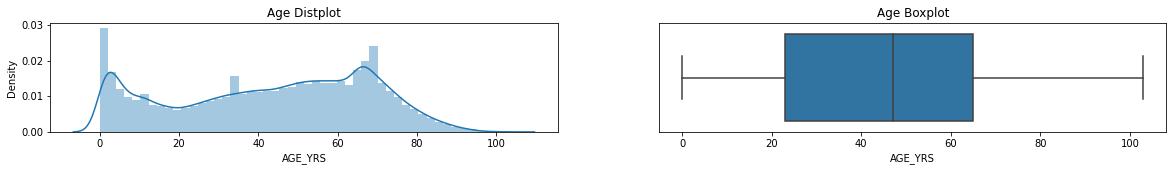

In [ ]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(vaers_flu['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(vaers_flu['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [ ]:
vaers_flu[vaers_flu['AGE_YRS'] <18]

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious,ime
22,27388,GA,7.00,0,Pt vaccinated with FLU developed fever vomitin...,0,NaN,0,0,0.0,...,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN),Cough,Pharyngitis,Pyrexia,Rhinitis,Vomiting,0,0
66,28578,NaN,10.00,1,Urticaria mild less tha hrs duration,0,NaN,0,0,0.0,...,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE),Urticaria,NaN,NaN,NaN,NaN,0,0
116,36126,NC,2.00,1,Sudden onset fever seizure activity eyes rolle...,0,NaN,0,1,0.0,...,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE),Convulsion,Gaze palsy,Hypertonia,Pyrexia,NaN,1,1
139,36508,NV,12.00,0,Severe local swelling redness pain inject site...,0,NaN,0,0,0.0,...,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN),Chills,Injection site hypersensitivity,Injection site oedema,Injection site pain,Myalgia,0,0
140,36508,NV,12.00,0,Severe local swelling redness pain inject site...,0,NaN,0,0,0.0,...,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN),Pyrexia,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178651,1987378,FR,1.00,0,DIFFICULTY RESPITAROIA MUCOSITE DIFFICOLTA RES...,0,NaN,0,0,0.0,...,FLUN4,"MEDIMMUNE VACCINES, INC.",INFLUENZA (SEASONAL) (FLUENZ TETRA),Airway peak pressure,Allergy test,Bacterial test,Cough,Dyspnoea,0,0
178652,1987378,FR,1.00,0,DIFFICULTY RESPITAROIA MUCOSITE DIFFICOLTA RES...,0,NaN,0,0,0.0,...,FLUN4,"MEDIMMUNE VACCINES, INC.",INFLUENZA (SEASONAL) (FLUENZ TETRA),Full blood count,Hyperpyrexia,Mucosal inflammation,NaN,NaN,1,1
178672,2007670,FR,1.67,0,This spontaneous case was received on Dec from...,0,NaN,0,0,0.0,...,FLUC4,"SEQIRUS, INC.",INFLUENZA (SEASONAL) (FLUCELVAX QUADRIVALENT),Vomiting,NaN,NaN,NaN,NaN,0,0
178694,2055203,FR,4.00,1,COMPLEX FEBRILE CONVULSIONS DIFFICULT TO BREAK...,0,NaN,0,0,0.0,...,FLUN4,"MEDIMMUNE VACCINES, INC.",INFLUENZA (SEASONAL) (FLUENZ TETRA),Bacterial test negative,Blood glucose normal,Blood test normal,Condition aggravated,Febrile convulsion,1,0


In [ ]:
vaers_flu[vaers_flu['AGE_YRS'] >90]

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious,ime
126,36320,IL,96.0,0,chilling achiness nausea inability to open han...,0,NaN,0,0,0.0,...,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE),Chills,Diarrhoea,Hypokinesia,Myalgia,Nausea,0,0
252,26318,AL,92.0,0,Pt vaccinated with Influenza Trivalent A B at ...,1,1990-10-12,0,0,0.0,...,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE),Pyrexia,NaN,NaN,NaN,NaN,1,0
500,65227,NY,93.0,1,leukocytoclastic vasculitis reported in a pt r...,0,NaN,0,0,0.0,...,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN),Purpura,Rash maculo-papular,Vasculitis,NaN,NaN,0,0
719,67962,NJ,91.0,1,pt recvd flu vax SEP the next day exp hearing ...,0,NaN,0,0,0.0,...,FLU3,PFIZER\WYETH,INFLUENZA (SEASONAL) (FLUSHIELD),Deafness,NaN,NaN,NaN,NaN,1,1
772,68096,IL,99.0,0,pt was to recvd of a dose of influenza vax x d...,0,NaN,0,0,0.0,...,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN),Chills,Nausea,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178563,1927143,FR,91.0,1,Cardiac arrest This spontaneous case was retri...,1,2021-11-09,0,0,0.0,...,FLUA3,NOVARTIS VACCINES AND DIAGNOSTICS,INFLUENZA (SEASONAL) (FLUAD),Cardiac arrest,Death,NaN,NaN,NaN,1,1
178583,1945612,FR,94.0,1,This is a spontaneous report received from a c...,0,NaN,0,0,0.0,...,FLU4,GLAXOSMITHKLINE BIOLOGICALS,INFLUENZA (SEASONAL) (FLUARIX QUADRIVALENT),Immunisation,Lip oedema,Pruritus,Seizure,Syncope,1,1
178630,1973383,FR,91.0,0,In the morning hours appearance of stroke symp...,1,2021-11-18,0,0,0.0,...,FLUA3,NOVARTIS VACCINES AND DIAGNOSTICS,INFLUENZA (SEASONAL) (FLUAD),Cerebrovascular accident,Death,Neurological symptom,NaN,NaN,1,1
178692,2037308,FR,97.0,0,Parkinsonism Bradykinesia This spontaneous cas...,0,NaN,0,0,0.0,...,FLUA3,NOVARTIS VACCINES AND DIAGNOSTICS,INFLUENZA (SEASONAL) (FLUAD),Bradykinesia,Parkinsonism,NaN,NaN,NaN,0,0


In [ ]:
vaers_flu.drop(vaers_flu[(vaers_flu['SYMPTOM1'] == 'SARS-CoV-2 test negative')|
           (vaers_flu['SYMPTOM2'] == 'SARS-CoV-2 test negative')| 
           (vaers_flu['SYMPTOM3'] == 'SARS-CoV-2 test negative')| 
           (vaers_flu['SYMPTOM4'] == 'SARS-CoV-2 test negative')| 
           (vaers_flu['SYMPTOM5'] == 'SARS-CoV-2 test negative')].index, inplace=True)

In [ ]:
vaers_flu.drop(vaers_flu[(vaers_flu['SYMPTOM1'] == 'Bacterial test negative')|
           (vaers_flu['SYMPTOM2'] == 'Bacterial test negative')| 
           (vaers_flu['SYMPTOM3'] == 'Bacterial test negative')| 
           (vaers_flu['SYMPTOM4'] == 'Bacterial test negative')| 
           (vaers_flu['SYMPTOM5'] == 'Bacterial test negative')].index, inplace=True)



In [ ]:
vaers_flu.drop(vaers_flu[(vaers_flu['SYMPTOM1'] == 'Inappropriate schedule of product administration')|
           (vaers_flu['SYMPTOM2'] == 'Inappropriate schedule of product administration')| 
           (vaers_flu['SYMPTOM3'] == 'Inappropriate schedule of product administration')| 
           (vaers_flu['SYMPTOM4'] == 'Inappropriate schedule of product administration')| 
           (vaers_flu['SYMPTOM5'] == 'Inappropriate schedule of product administration')].index, inplace=True)

In [ ]:
vaers_flu.drop(vaers_flu[(vaers_flu['SYMPTOM1'] == 'SARS-CoV-2 test negative')|
           (vaers_flu['SYMPTOM2'] == 'SARS-CoV-2 test negative')| 
           (vaers_flu['SYMPTOM3'] == 'SARS-CoV-2 test negative')| 
           (vaers_flu['SYMPTOM4'] == 'SARS-CoV-2 test negative')| 
           (vaers_flu['SYMPTOM5'] == 'SARS-CoV-2 test negative')].index, inplace=True)

In [ ]:
df = vaers_flu

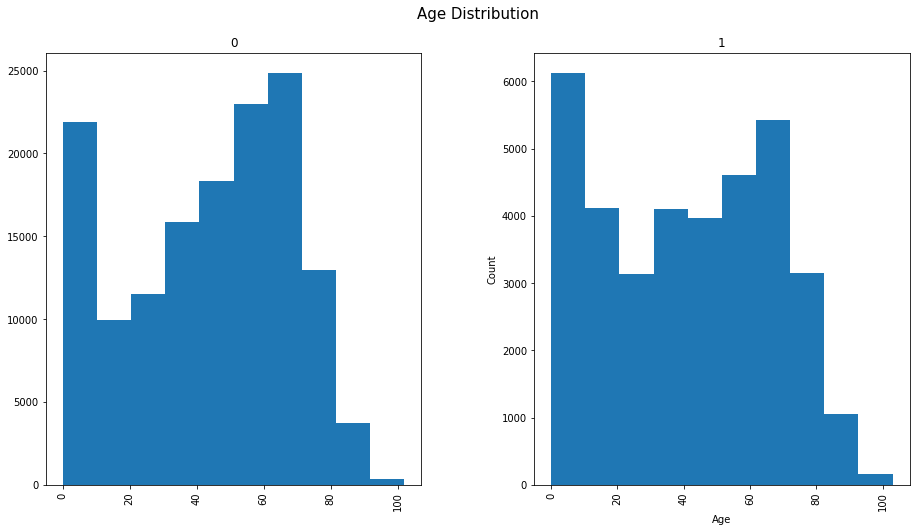

In [ ]:
# Distribution of adverse event severity based on age
df['AGE_YRS'].hist(by=df['serious'], figsize=(15,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Distribution', fontsize=15);


In [ ]:

plt.figure(figsize=(15,8))
labels = df['VAX_MANU'].value_counts().index
values = df['VAX_MANU'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,marker_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)','rgb(177, 127, 38)', 'rgb(205, 152, 36)', 'rgb(99, 79, 37)',
                     'rgb(129, 180, 179)', 'rgb(124, 103, 37)','rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)'])])
fig.show()

<Figure size 1080x576 with 0 Axes>

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df['VAX_MANU'].value_counts().index
values1 = df[df['serious'] == 1].VAX_MANU.value_counts().values
values2 = df[df['serious'] == 0].VAX_MANU.value_counts().values
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= values1, name="Serious case",marker_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)','rgb(177, 127, 38)', 'rgb(205, 152, 36)', 'rgb(99, 79, 37)',
                     'rgb(129, 180, 179)', 'rgb(124, 103, 37)','rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Non Serious case",marker_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)', 'rgb(34, 53, 101)',
                'rgb(36, 55, 57)', 'rgb(6, 4, 4)','rgb(177, 127, 38)', 'rgb(205, 152, 36)', 'rgb(99, 79, 37)',
                     'rgb(129, 180, 179)', 'rgb(124, 103, 37)','rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Seriousness of Vaccine Manufacturer",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Serious', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='Non Serious', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

([<matplotlib.axis.XTick at 0x7f710c0208d0>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male'), Text(0, 0, 'Unknown')])

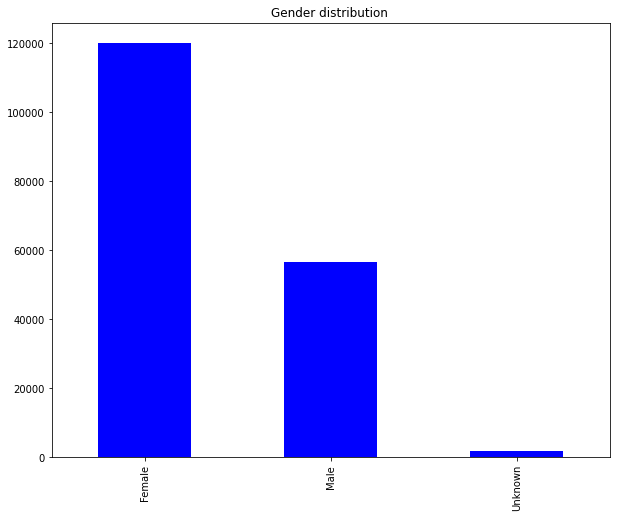

In [ ]:
plt.figure(figsize=(10,8))
route = df['SEX'].value_counts()
route.plot(kind='bar', title='Gender distribution ',color="b")
values = ['Female', 'Male', 'Unknown'] 
plt.xticks(route.index,values)

In [ ]:
gender_serious = (df.groupby(['SEX', 'serious']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count'))

In [ ]:
map_dict = {1: "Male", 0 : "Female", 2 :"Unknown"}
map_dict_s = {1: "Serious", 0 : "Non Serious"}
gender_serious["SEX"] = gender_serious["SEX"].map(map_dict)
gender_serious["serious"] = gender_serious["serious"].map(map_dict_s)
gender_serious

,SEX,serious,count
0,Female,Non Serious,99116
1,Male,Non Serious,41721
2,Female,Serious,20815
3,Male,Serious,14865
4,Unknown,Non Serious,1615
5,Unknown,Serious,177


In [ ]:
import plotly.express as px


fig = px.bar(gender_serious, x="SEX", y="count", color="serious", title="Gender seriousness comparison",text_auto=True,
             color_discrete_sequence=px.colors.qualitative.Prism)

fig.update_layout(
    template="plotly_white",
    xaxis=dict(title_text="Gender"),
    yaxis=dict(title_text="count")
)
fig.show()

In [ ]:
# drop all rows with unkown SEX
df = df[df['SEX'] != 2]

In [ ]:
age_serious = df[['AGE_YRS', 'serious']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}

age_serious["serious"] = age_serious["serious"].map(map_dict_s)


In [ ]:
bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(age_serious['AGE_YRS'], bins, labels=group)

age_serious['category'] = categories

In [ ]:
age_serious_group = (age_serious.groupby(['category', 'serious']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count'))

In [ ]:
fig = px.bar(age_serious_group, x="category", y="count", color="serious", text_auto=True,color_discrete_sequence=px.colors.qualitative.Prism,
             title="Age Category and seriousness comparison")
fig.update_layout(
    template="plotly_white",
    xaxis=dict(title_text="Age Category"),
    yaxis=dict(title_text="Count")
)
fig.show()

In [ ]:
age_serious_sex = df[['AGE_YRS','SEX', 'serious']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
map_dict = {1: "Male", 0 : "Female"}
age_serious_sex["serious"] = age_serious_sex["serious"].map(map_dict_s)
age_serious_sex["SEX"] = age_serious_sex["SEX"].map(map_dict)

bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(age_serious_sex['AGE_YRS'], bins, labels=group)

age_serious_sex['category'] = categories


In [ ]:
age_serious_sex1 = (age_serious_sex.groupby(['category','SEX', 'serious']).size()  
   .reset_index(name='count'))

In [ ]:
#https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460
fig = go.Figure()

fig.update_layout(
    template="plotly_white",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender",
    barmode="stack",
)

colors = ["#9467bd", "#1f77b4"]
for r, c in zip(age_serious_sex1.serious.unique(), colors):
    plot_df = age_serious_sex1[age_serious_sex1.serious == r]
    fig.add_trace(
        go.Bar(x=[plot_df.category, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [ ]:
subset_df = df[['AGE_YRS','SEX','DIED','VAX_MANU']]
map_dict_d = {1: "Death", 0 : "No Death"}
map_dict = {1: "Male", 0 : "Female"}
subset_df["SEX"] = subset_df["SEX"].map(map_dict)
subset_df["DIED"] = subset_df["DIED"].map(map_dict_d)

bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(subset_df['AGE_YRS'], bins, labels=group)

subset_df['category'] = categories


In [ ]:
subset_df1 = (subset_df.groupby(['category','SEX', 'DIED']).size()  
   .reset_index(name='count'))

In [ ]:
#https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460
fig = go.Figure()

fig.update_layout(
    template="plotly_white",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender Vs Death/No Death",
    barmode="stack",
)

colors = ["#9467bd", "#1f77b4"]
for r, c in zip(subset_df1.DIED.unique(), colors):
    plot_df = subset_df1[subset_df1.DIED == r]
    fig.add_trace(
        go.Bar(x=[plot_df.category, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [ ]:
sub = subset_df[(subset_df["DIED"] == 'Death')]
sub = (sub.groupby(['DIED','VAX_MANU']).size().reset_index(name='count'))
sub1 =(df.groupby(['VAX_MANU']).size().reset_index(name='count'))
sub1 = sub1.rename(columns={"count":"totalcount"})
sub1= sub1.merge(sub, on = 'VAX_MANU')
sub1.drop('DIED',axis=1,inplace=True)
sub1['Percentage'] = sub1['count'].div(sub1['totalcount']).round(4)*100
sub1

,VAX_MANU,totalcount,count,Percentage
0,AVENTIS PASTEUR,657,11,1.67
1,CONNAUGHT LABORATORIES,4432,93,2.10
2,CSL LIMITED,8636,40,0.46
3,EVANS VACCINES,1934,35,1.81
4,GLAXOSMITHKLINE BIOLOGICALS,25380,199,0.78
5,LEDERLE LABORATORIES,81,6,7.41
6,"MEDEVA PHARMA, LTD.",1151,37,3.21
7,"MEDIMMUNE VACCINES, INC.",12290,47,0.38
8,NOVARTIS VACCINES AND DIAGNOSTICS,23935,186,0.78
9,PARKDALE PHARMACEUTICALS,514,2,0.39


In [ ]:
subset_death = df[(df["DIED"] == 1)]
subset_death = subset_death[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]
subset_death['Symptoms'] = subset_death[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_symp['Symptoms'] = df_symp['SYMPTOM1'] + "," +  df_symp['SYMPTOM2'] + "," +  df_symp['SYMPTOM3'] + "," +  df_symp['SYMPTOM4'] + "," +  df_symp['SYMPTOM5']
#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans
subset_death

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms
0,27275,Apnoea,Cardiac arrest,NaN,NaN,NaN,"Apnoea,Cardiac arrest"
40,27529,Right ventricular failure,NaN,NaN,NaN,NaN,Right ventricular failure
67,28753,Cough,Depression,Dizziness,Dyspnoea,Hyperhidrosis,"Cough,Depression,Dizziness,Dyspnoea,Hyperhidrosis"
68,28753,Pallor,Pharyngitis,Pyrexia,NaN,NaN,"Pallor,Pharyngitis,Pyrexia"
74,29143,Cyanosis,Dysphonia,Myasthenic syndrome,Neoplasm malignant,Vocal cord paralysis,"Cyanosis,Dysphonia,Myasthenic syndrome,Neoplas..."
...,...,...,...,...,...,...,...
178678,2012997,Gout,Haematuria,Hyperhidrosis,Hypertriglyceridaemia,Loss of consciousness,"Gout,Haematuria,Hyperhidrosis,Hypertriglycerid..."
178679,2012997,Nephrectomy,Oxygen saturation decreased,Pyrexia,Strangury,Type 2 diabetes mellitus,"Nephrectomy,Oxygen saturation decreased,Pyrexi..."
178680,2012997,Urinary retention,NaN,NaN,NaN,NaN,Urinary retention
178698,2064968,Cardiac arrest,Dyspnoea,Hyperhidrosis,Loss of consciousness,Orthopnoea,"Cardiac arrest,Dyspnoea,Hyperhidrosis,Loss of ..."


In [ ]:
subset_death = subset_death.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})
df_covid_all_sym = subset_death.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()
df_covid_sym_id = df_covid_all_sym.assign(Symptoms=df_covid_all_sym.Symptoms.str.split(','))
df_covid_sym1 = df_covid_sym_id.explode('Symptoms')

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

(-0.5, 1299.5, 867.5, -0.5)

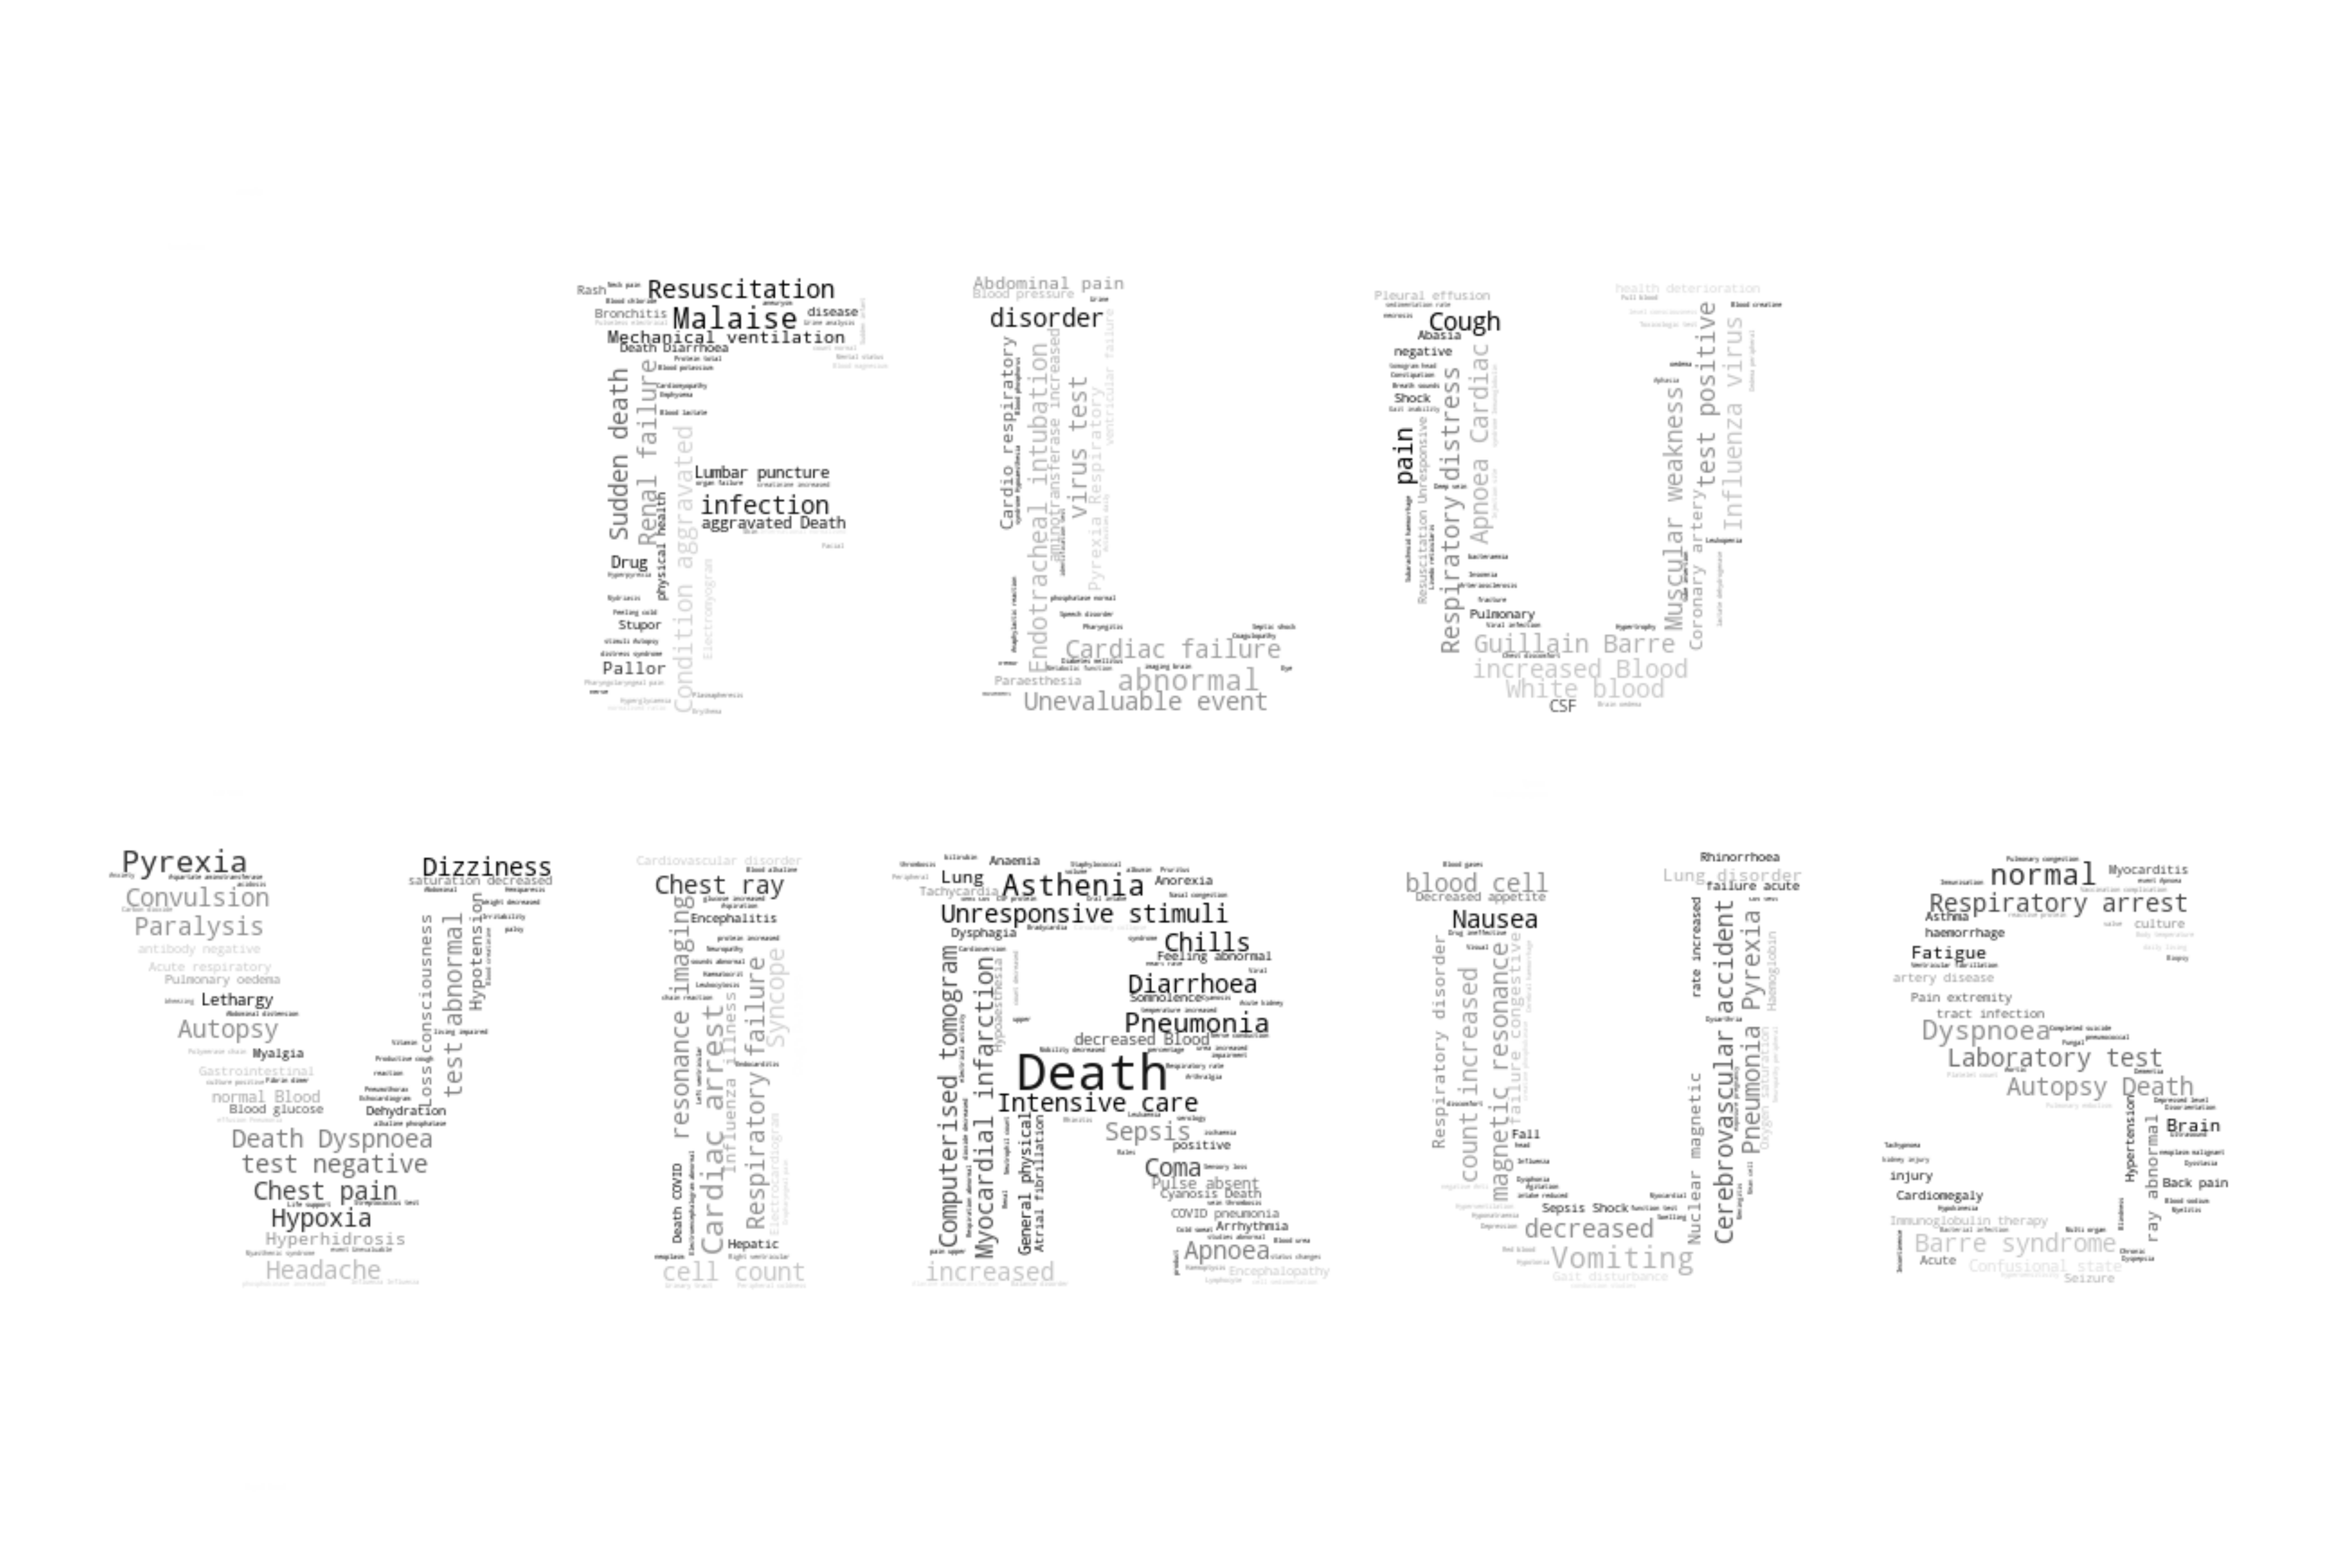

In [ ]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
mask = np.array(Image.open("/content/drive/Shareddrives/Team A 606 Capstone Project/Flu.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(df_covid_all_sym.Symptoms))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[100,100])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

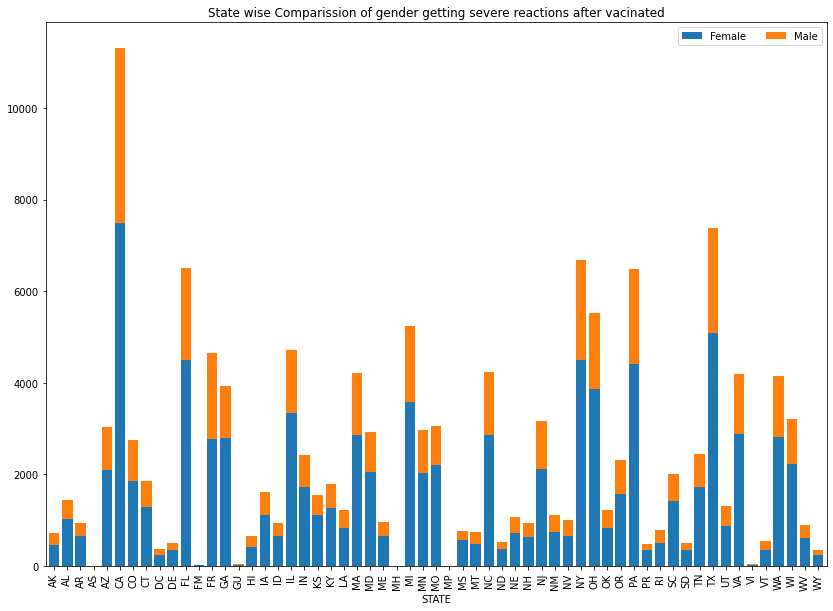

In [ ]:
StateAnalysis = df[['VAERS_ID','STATE','VAX_MANU','SEX','AGE_YRS','DIED','RECOVD','serious']].drop_duplicates()
StateAnalysis = StateAnalysis[StateAnalysis['STATE'] != '']
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SEX).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['Female', 'Male'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of gender getting severe reactions after vacinated', loc ='center')
plt.show()

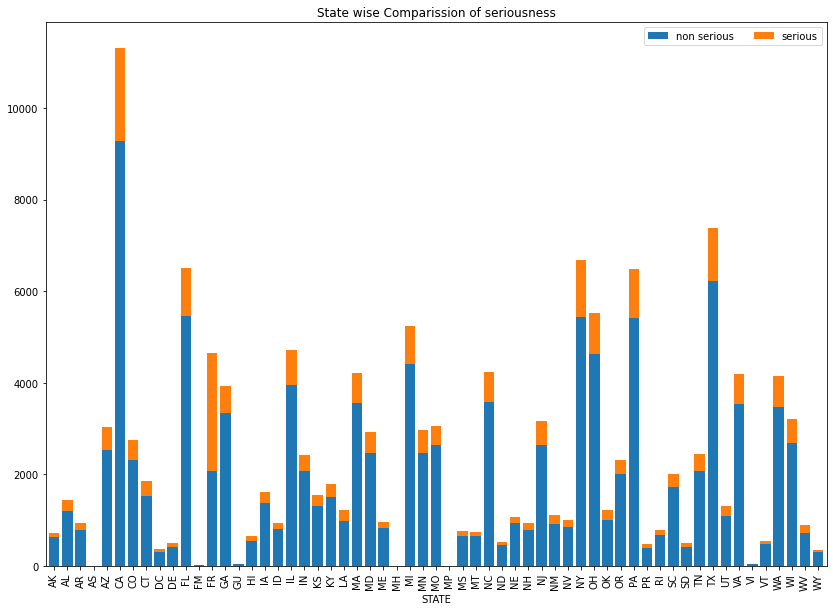

In [ ]:
pd.crosstab(StateAnalysis.STATE,StateAnalysis.serious).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['non serious', 'serious'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of seriousness', loc ='center')
plt.show()

In [ ]:
df_covid_allergies = df.filter(['VAERS_ID','ALLERGIES','serious'], axis=1)
df_covid_allergies.head()

,VAERS_ID,ALLERGIES,serious
0,27275,NaN,1
1,27278,NaN,0
2,27281,NaN,1
3,27290,NaN,1
4,27291,NaN,0


In [ ]:
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].astype(str)

# Remove punctuation
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].str.replace('[^\w\s]','')

# Convert to lower case
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: x.lower())

# Tokenize
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: x.split())
df_covid_allergies.head()

,VAERS_ID,ALLERGIES,serious
0,27275,[nan],1
1,27278,[nan],0
2,27281,[nan],1
3,27290,[nan],1
4,27291,[nan],0


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Stop Words
stop_words=set(stopwords.words("english"))
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: [stemmer.stem(y) for y in x])
df_covid_allergies.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,VAERS_ID,ALLERGIES,serious
0,27275,[nan],1
1,27278,[nan],0
2,27281,[nan],1
3,27290,[nan],1
4,27291,[nan],0


In [ ]:
# Unpack lists with Pandas

df_covid_allergies = df_covid_allergies.explode('ALLERGIES', ignore_index=True)


In [ ]:
# Get the frequency of allergies
df_covid_allergies['ALLERGIES'].value_counts(ascending = False)

nan           142904
none           10636
allergi         3507
penicillin      3004
known           2883
               ...  
social             1
counteract         1
track              1
pop                1
dytan              1
Name: ALLERGIES, Length: 4294, dtype: int64

In [ ]:
# Only kepp allergies that are in more than 1000 patients
allergies_count = df_covid_allergies.ALLERGIES.value_counts()
df_covid_allergies = df_covid_allergies[df_covid_allergies.ALLERGIES.isin(allergies_count.index[allergies_count.gt(100)])]
df_covid_allergies['ALLERGIES'].value_counts(ascending = False)

nan           142904
none           10636
allergi         3507
penicillin      3004
known           2883
               ...  
see              105
quinolon         104
n                103
sulfur           103
dog              103
Name: ALLERGIES, Length: 100, dtype: int64

In [ ]:
# Drop rows with "nan","none","allergi","food","known","unknown","reaction","na","report", "medic"

df_covid_allergies = df_covid_allergies.drop(df_covid_allergies[df_covid_allergies.ALLERGIES.isin(["nan","past","updat","allerg",
                                                                                                   "none","comment","document","drug",
                                                                                                   "sulfa","nka","nkda","allergi","food",
                                                                                                   "known","unknown","reaction","na","report", 
                                                                                                   "medic","n","see","pcn"])].index)
df_covid_allergies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23000 entries, 120538 to 222622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VAERS_ID   23000 non-null  int64 
 1   ALLERGIES  23000 non-null  object
 2   serious    23000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 718.8+ KB


In [ ]:
S_ALLERGIES  = df_covid_allergies[df_covid_allergies['serious']== 1]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))

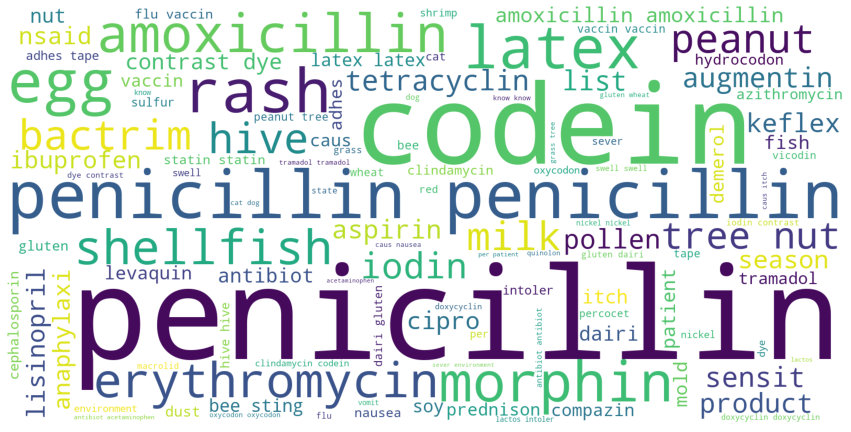

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
NS_ALLERGIES  = df_covid_allergies[df_covid_allergies['serious']== 0]
wordcloud3 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(NS_ALLERGIES.ALLERGIES))

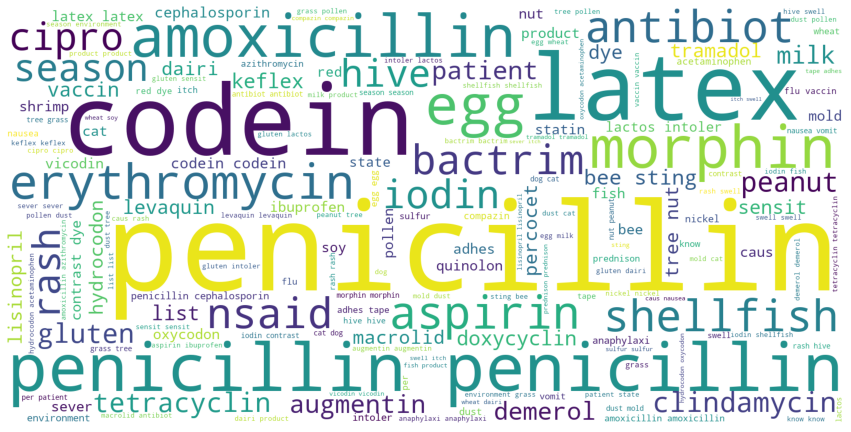

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [ ]:
df_ML = df.copy()

In [ ]:
df_ML.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 176517 entries, 0 to 178702
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      176517 non-null  int64  
 1   STATE         167730 non-null  object 
 2   AGE_YRS       176517 non-null  float64
 3   SEX           176517 non-null  int64  
 4   SYMPTOM_TEXT  176517 non-null  object 
 5   DIED          176517 non-null  int64  
 6   DATEDIED      1380 non-null    object 
 7   L_THREAT      176517 non-null  int64  
 8   HOSPITAL      176517 non-null  int64  
 9   HOSPDAYS      176517 non-null  float64
 10  X_STAY        176517 non-null  int64  
 11  DISABLE       176517 non-null  int64  
 12  RECOVD        176517 non-null  int64  
 13  VAX_DATE      176517 non-null  object 
 14  ONSET_DATE    176517 non-null  object 
 15  NUMDAYS       176517 non-null  int64  
 16  OTHER_MEDS    110105 non-null  object 
 17  CUR_ILL       127619 non-null  object 
 18  HIST

In [ ]:
df_knn_ML = df_ML.drop(['STATE','DATEDIED','X_STAY','VAX_DATE','ONSET_DATE','NUMDAYS',
            'ER_ED_VISIT','VAX_TYPE','VAX_NAME','ime'
],axis=1)

In [ ]:
df_ML.drop(['VAERS_ID','STATE','DATEDIED','X_STAY','VAX_DATE','ONSET_DATE','NUMDAYS',
            'ER_ED_VISIT','VAX_TYPE','VAX_NAME','ime'
],axis=1,inplace=True)

In [ ]:
df_ML

,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,OTHER_MEDS,...,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_MANU,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious
0,82.0,1,Pt vaccinated with FLUOGEN apparent cardiac ar...,1,0,0,0.0,0,0,Ascriptin Metamucil,...,No allergies murmur parkinson s dsiease arthri...,0,NaN,PARKE-DAVIS,Apnoea,Cardiac arrest,NaN,NaN,NaN,1
1,57.0,1,Pt vaccinated with Pneumococcal FLU ZONE devel...,0,0,0,0.0,0,1,Advil Theolair,...,emphysema Rt shoulder injury smoker,0,NaN,CONNAUGHT LABORATORIES,Injection site oedema,Injection site reaction,Malaise,Vomiting,NaN,0
2,19.0,0,Pt vaccinated with FLUOGEN passed out at schoo...,0,0,0,0.0,0,1,Lanoxin,...,past hx of PVC pulmonary hypertension Down s synd,0,NaN,PARKE-DAVIS,Syncope,NaN,NaN,NaN,NaN,1
3,71.0,0,Pt vaccinated with FLU experienced vomiting fo...,0,0,1,4.0,0,1,Capoten,...,NaN,0,NaN,CONNAUGHT LABORATORIES,Diarrhoea,Vomiting,NaN,NaN,NaN,1
4,68.0,1,Pt vaccinated w FLU developed sore throat stif...,0,0,0,0.0,0,1,BP diuretics K heart med,...,Increased BP Heart trouble asthmatic Bronchitis,0,NaN,CONNAUGHT LABORATORIES,Asthma,Bronchitis,Nuchal rigidity,Pharyngitis,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178698,86.0,0,Cardiovascular arrest Loss of consciousness Ac...,1,0,0,0.0,0,0,Cotareg Sertraline,...,NaN,0,NaN,NOVARTIS VACCINES AND DIAGNOSTICS,Cardiac arrest,Dyspnoea,Hyperhidrosis,Loss of consciousness,Orthopnoea,1
178699,92.0,0,After doses of Covid vaccine in conjunction wi...,1,0,0,0.0,0,0,NaN,...,NaN,0,NaN,SANOFI PASTEUR,Bronchitis chronic,Pyrexia,NaN,NaN,NaN,1
178700,46.0,1,Tightness in throat Generalized redness A year...,0,0,0,0.0,0,1,Duloxetine Ezetimibe,...,Medical History Concurrent Conditions Acute my...,0,NaN,"SEQIRUS, INC.",Erythema,Product administered to patient of inappropria...,Throat tightness,NaN,NaN,0
178701,48.0,0,Hyperthyroid Supressed detectable TSH Myalgia ...,0,0,0,0.0,0,1,NaN,...,Comments None,0,NaN,"SEQIRUS, INC.",Autoantibody test,Blood thyroid stimulating hormone,Blood thyroid stimulating hormone decreased,Hyperthyroidism,Myalgia,1


In [ ]:
df_ML.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/flu_ml.csv', index=False)

In [ ]:
df_knn_ML.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/flu_knn_ml.csv', index=False)